## Classifier: Risk models designed to assess the likelihood of a customer defaulting on repayment.

#### Goal:
The goal is to develop risk models in order to measure the probability of a customer ceasing repayment of their balance. Your task is to build a classifier that predicts which customers will be unable to pay their balance for 2 months within the next 12 months.

#### Focus:
For this task, we are mostly interested in observing your methodology. So, please focus on implementing the appropriate preprocessing steps while writing clean and documented code. 

#### Dataset: 
You are given two datasets, “X.csv” and “y.csv”, containing the features and the labels respectively. Your task is to split the dataset into train and test sets and fit only 2 classification algorithms on the training set. You may choose any classification algorithms that you prefer. After fitting, evaluate the performance of the two models on the test set.

#### The file “X.csv” has the following columns:
* id: unique identifier of the account
* existing_score: the score of the existing machine learning model (you may use it as an input or for checking if your model performs better than the existing model)
* open_to_buy: the difference between the credit limit and the balance. If the customer does not have a credit card, it is NaN.
* months_since_first_loan_issued: number of months since the first loan was issued. If the customer has not taken any loans, it is NaN
* existing_credit_card_utilization: balance / credit limit * 100, e.g. 30 means that 30% of the credit limit is utilized. If the customer does not have a credit card already, it is NaN
* n_months_mortgage_loan_paid: number of months during which the balance of the account decreased. If the customer does not have a mortgage already, it is NaN

#### The file “y.csv” contains the following columns:
* id: unique identifier of the account
* label: 1 if the account did not pay their balance for 2 months during the next 12 months, otherwise 0.

In [212]:
# Import libraries Import Libraries: Start by importing the necessary libraries for data manipulation 
# and visualization, such as Pandas, NumPy, and Matplotlib/Seaborn.

import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from warnings import filterwarnings 
filterwarnings("ignore")

### Performing Exploratory Data Analysis (EDA)

1. Data Exploration: Explore the basic characteristics of the dataset to gain initial insights:
    * View the first few rows of the dataset using df.head() to get an overview of the data structure and column names.
    * Check the dimensions of the dataset using df.shape to see the number of rows and columns.
    * Use df.info() to get information about the data types, non-null counts, and memory usage of each column.
    * Use df.describe() to get summary statistics (count, mean, standard deviation, quartiles) for numerical columns.
    * Check for missing values using df.isnull().sum() to identify columns with missing values and their counts.
    

2. Data Visualization: Create visualizations to understand the distribution and relationships between variables:
    * Generate histograms, box plots, or kernel density plots using libraries like Matplotlib or Seaborn to explore the distribution of numerical variables.
    * Use scatter plots, line plots, or heatmaps to examine relationships between variables.


3. Feature Analysis: Analyze the relationship between features and the target variable:
    * Plot the distribution of the target variable using appropriate visualizations.
    * Examine the relationship between individual features and the target variable using scatter plots, box plots, or violin plots.
    * Calculate correlation coefficients or use correlation matrices to identify correlations between features.
    * Data Preprocessing: Perform necessary data preprocessing steps to clean, transform, or engineer features based on the insights gained from the analysis. This may involve handling missing values, dealing with outliers, encoding categorical variables, and feature scaling.


4. Further Analysis: Conduct more advanced analysis or statistical tests, if required, to gain deeper insights or validate hypotheses. This may include feature selection, dimensionality reduction, or statistical tests for comparing groups or detecting patterns.

### To developing the Models, I performed the following steps:

1. Split the dataset into train and test sets: I need to divide the data from "X.csv" and "y.csv" into two separate sets: a training set and a test set. The training set will be used to train the classification algorithms, while the test set will be used to evaluate the performance of the trained models.


2. Choose two classification algorithms: I have the freedom to select any two classification algorithms that I prefer. Common choices include logistic regression, decision trees, random forests, support vector machines (SVM), or gradient boosting algorithms like XGBoost or LightGBM.


3. Fit the chosen classification algorithms on the training set: Once I have selected the algorithms, I need to train them using the training data. This involves using the features from "X.csv" and the corresponding labels from "y.csv" to teach the models how to classify the accounts.


4. Evaluate the performance of the models on the test set: After fitting the models, I need to use the trained models to predict the labels for the test set accounts. Then, I can compare these predictions with the actual labels from "y.csv" to assess how well the models perform. Common evaluation metrics for classification tasks include accuracy, precision, recall, and F1 score.


By following these steps, I will be able to split the dataset, train two classification algorithms on the training set, and evaluate their performance on the test set. The specific algorithms chosen and their performance will depend on the implementation and analysis conducted during the task.

In [213]:
# Read all csv files, for train data
df_X_risk = pd.read_csv('X.csv')
df_y_risk = pd.read_csv('y.csv')

In [214]:
# Display the first five rows of the DataFrame
df_X_risk.head()

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid
0,0,287.0,68.0,52.0,NaN,12.0
1,1,457.0,603.0,NaN,NaN,6.0
2,2,227.0,757.0,9.0,54.0,2.0
3,3,658.0,8207.0,155.0,10.0,11.0
4,4,269.0,384.0,58.0,98.0,13.0


In [215]:
# Display the first five rows of the DataFrame
df_y_risk.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [216]:
# The shape of the DataFrame (n_rows, n_columns)
df_X_risk.shape

(10000, 6)

In [217]:
# The shape of the DataFrame (n_rows, n_columns)
df_y_risk.shape

(10000, 2)

In [218]:
# Display information about the DataFrame
df_X_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10000 non-null  int64  
 1   existing_score                    10000 non-null  float64
 2   open_to_buy                       8423 non-null   float64
 3   months_since_first_loan_issued    7909 non-null   float64
 4   existing_credit_card_utilization  6574 non-null   float64
 5   n_months_mortgage_loan_paid       9120 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


The output you provided is the result of calling the info() method on the DataFrame df_X_train. This method provides information about the data types and non-null counts for each column in the DataFrame.

Here's the breakdown of the information provided:

The DataFrame has a RangeIndex, indicating that the index of the DataFrame ranges from 0 to 9999 (a total of 10,000 entries).
The DataFrame contains 6 columns.
The column names and their corresponding non-null counts are listed.
The "id" column has 10,000 non-null values and is of the int64 data type.
The "existing_score" column has 10,000 non-null values and is of the float64 data type.
The "open_to_buy" column has 8,423 non-null values and is of the float64 data type.
The "months_since_first_loan_issued" column has 7,909 non-null values and is of the float64 data type.
The "existing_credit_card_utilization" column has 6,574 non-null values and is of the float64 data type.
The "n_months_mortgage_loan_paid" column has 9,120 non-null values and is of the float64 data type.
The memory usage of the DataFrame is approximately 468.9 KB.
The info() method is useful for quickly inspecting the data types, non-null counts, and memory usage of a DataFrame. It helps to identify missing values (represented as NaN) and understand the overall structure of the DataFrame.

In [219]:
# Compute the descriptive statistics of the DataFrame and transpose the result
df_X_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
existing_score,10000.0,455.101200,148.468503,71.0,338.00,436.0,572.00,801.0
open_to_buy,8423.0,6366.140449,10395.441692,0.0,645.00,2381.0,7569.00,260373.0
months_since_first_loan_issued,7909.0,94.764066,75.162791,0.0,38.00,76.0,135.00,553.0
existing_credit_card_utilization,6574.0,48.868117,36.674519,0.0,10.00,48.0,86.00,134.0
n_months_mortgage_loan_paid,9120.0,9.125877,3.936767,0.0,7.00,10.0,12.00,14.0


The count row indicates the number of non-null values for each column.
The mean row represents the average value of each column.
The std row represents the standard deviation of each column, which measures the spread or variability of the data.
The min row represents the minimum value observed in each column.
The 25% row represents the first quartile, which is the value below which 25% of the data falls.
The 50% row represents the median or the second quartile, which is the value below which 50% of the data falls.
The 75% row represents the third quartile, which is the value below which 75% of the data falls.
The max row represents the maximum value observed in each column.
Here's a breakdown of the statistics for each column:

id: The count is 10,000, indicating that all 10,000 entries have non-null values. The minimum and maximum values are 0 and 9999, respectively. The mean is 4999.5, and the standard deviation is approximately 2886.9.
existing_score: The count is 10,000, indicating that all entries have non-null values. The minimum and maximum values are 71.0 and 801.0, respectively. The mean is approximately 455.1, and the standard deviation is approximately 148.5.
open_to_buy: The count is 8,423, indicating that there are missing values (NaN) in this column. The minimum and maximum values are 0.0 and 260,373.0, respectively. The mean is approximately 6366.1, and the standard deviation is approximately 10,395.4.
months_since_first_loan_issued: The count is 7,909, indicating that there are missing values (NaN) in this column. The minimum and maximum values are 0.0 and 553.0, respectively. The mean is approximately 94.8, and the standard deviation is approximately 75.2.
existing_credit_card_utilization: The count is 6,574, indicating that there are missing values (NaN) in this column. The minimum and maximum values are 0.0 and 134.0, respectively. The mean is approximately 48.9, and the standard deviation is approximately 36.7.
n_months_mortgage_loan_paid: The count is 9,120, indicating that there are missing values (NaN) in this column. The minimum and maximum values are 0.0 and 14.0, respectively. The mean is approximately 9.1, and the standard deviation is approximately 3.9.

### Checking for duplicate records

In [220]:
# Check for duplicate
dups = df_X_risk.duplicated()
print(f'Number of duplicate row = { dups.sum() }')

Number of duplicate row = 0


### Checking for missing value

In [221]:
# Count the number of missing values in each column of the DataFrame
df_X_risk.isnull().sum()

id                                     0
existing_score                         0
open_to_buy                         1577
months_since_first_loan_issued      2091
existing_credit_card_utilization    3426
n_months_mortgage_loan_paid          880
dtype: int64

In [222]:
# Count the number of missing values in each column of the DataFrame
df_y_risk.isnull().sum()

id       0
label    0
dtype: int64

Dealing with missing values is an important step in data preprocessing. There are several strategies I can consider for handling missing values in your dataset. The choice of strategy depends on the nature of the data and the specific requirements of my analysis.

It's important to note that the choice of handling missing values should be made carefully, as it can impact the results and conclusions drawn from your analysis. Consider the underlying assumptions, potential biases, and the impact on the quality and integrity of the data when deciding on the most appropriate approach.

Before applying any handling strategy, it's recommended to further investigate the reasons for missing values. It could be due to data collection issues, specific patterns in the data, or missingness related to the target variable. Understanding the nature of missingness can provide valuable insights for selecting the most suitable approach. In this case missing value means:  If the customer does not have a credit card; If the customer has not taken any loans; If the customer does not have a credit card already; If the customer does not have a mortgage already

Given the specific meaning of the missing values in the dataset, traditional imputation methods such as mean, median, mode, forward or backward filling, linear interpolation, or multiple imputation may not be suitable. This is because the NaN values indicate specific conditions such as the absence of a credit card, no prior loans, no existing credit card, or no mortgage.

To handle these missing values appropriately, my proposed strategy is to replace the NaN values with "-1", while considering that the variables in question are of the float64 data type. By using "-1" as a distinct value, it explicitly represents the absence or non-existence of certain features in the dataset.

This strategy allows for the retention of valuable information about the absence of certain features while preserving the data type consistency. However, it's crucial to document and communicate this transformation clearly to ensure proper interpretation of the dataset. Users should be aware that a value of "-1" indicates the lack of a specific feature.

When applying analysis techniques to the modified dataset, it's important to consider how the introduction of "-1" may impact subsequent analyses or modeling tasks. Some algorithms may handle this value automatically, while others may require special handling or preprocessing steps to account for its presence.

Before applying this strategy, it's advisable to evaluate its implications for the specific analysis or modeling tasks at hand. I will consider the compatibility of the "-1" value with the algorithms and models being used, and assess any potential impact on performance or validity.

In summary, replacing the missing values with "-1" in the given context of the dataset can be a suitable strategy, as it effectively encodes the absence of certain features. However, careful consideration should be given to data interpretation, algorithm compatibility, and potential downstream effects on analysis or modeling tasks.

In [223]:
# Replaces all the missing values in df_X_risk with -1 and returns a new DataFrame
df_X_risk_filled = df_X_risk.fillna(-1)

In [224]:
# Count the number of missing values in each column
df_X_risk_filled.isnull().sum()

id                                  0
existing_score                      0
open_to_buy                         0
months_since_first_loan_issued      0
existing_credit_card_utilization    0
n_months_mortgage_loan_paid         0
dtype: int64

In [225]:
# Display the first five rows of the DataFrame
df_X_risk_filled.head()

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid
0,0,287.0,68.0,52.0,-1.0,12.0
1,1,457.0,603.0,-1.0,-1.0,6.0
2,2,227.0,757.0,9.0,54.0,2.0
3,3,658.0,8207.0,155.0,10.0,11.0
4,4,269.0,384.0,58.0,98.0,13.0


In [226]:
# Concatenate df_X_risk and df_y_risk based on "id"
df_risk = pd.concat([df_X_risk_filled.set_index("id"), df_y_risk.set_index("id")], axis=1)

# Reset the index to default RangeIndex
df_risk = df_risk.reset_index()

In [227]:
# Display the first five rows of the DataFrame
df_risk.head()

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid,label
0,0,287.0,68.0,52.0,-1.0,12.0,0
1,1,457.0,603.0,-1.0,-1.0,6.0,0
2,2,227.0,757.0,9.0,54.0,2.0,0
3,3,658.0,8207.0,155.0,10.0,11.0,0
4,4,269.0,384.0,58.0,98.0,13.0,1


In [228]:
# Display information about the DataFrame
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10000 non-null  int64  
 1   existing_score                    10000 non-null  float64
 2   open_to_buy                       10000 non-null  float64
 3   months_since_first_loan_issued    10000 non-null  float64
 4   existing_credit_card_utilization  10000 non-null  float64
 5   n_months_mortgage_loan_paid       10000 non-null  float64
 6   label                             10000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 547.0 KB


In [229]:
# The shape of the DataFrame (n_rows, n_columns)
df_risk.shape

(10000, 7)

### Data Visualization: Create visualizations to understand the distribution and relationships between variables

In [230]:
# The function to create individual variable visualizations
def ShowFig(column):
    print('Description of '+ column)
    print('---------------------------------------')
    print(df_risk[column].describe(), end = '')
    print('\n-------------------------------------')

    # Create a new figure or plot in Matplotlib
    plt.figure()
    print('Distribution of '+ column)
    print('---------------------------------------')
    # Create a distribution plot (histogram) using Seaborn
    sns.distplot(df_risk[column], kde = True, color = 'g')
    plt.show()
    
    # Create a new figure or plot in Matplotlib
    plt.figure()
    print('BoxPlot of' + column)
    print('-----------------------------------------')
    # Create a box plot using Seaborn
    sns.boxplot(df_risk[column])
    plt.show()

Description of existing_score
---------------------------------------
count    10000.000000
mean       455.101200
std        148.468503
min         71.000000
25%        338.000000
50%        436.000000
75%        572.000000
max        801.000000
Name: existing_score, dtype: float64
-------------------------------------
Distribution of existing_score
---------------------------------------


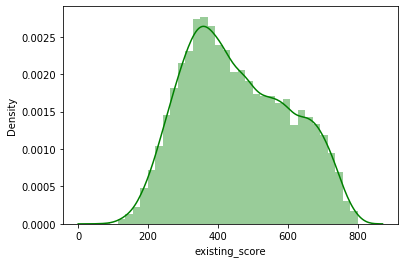

BoxPlot ofexisting_score
-----------------------------------------


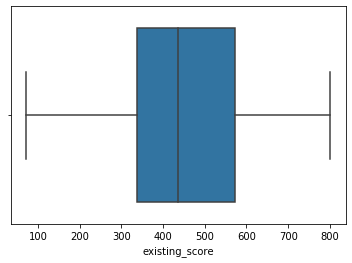

In [231]:
column = 'existing_score'

ShowFig(column)

Almost a normal distibution

Description of open_to_buy
---------------------------------------
count     10000.000000
mean       5362.042400
std        9818.715765
min          -1.000000
25%         211.750000
50%        1529.000000
75%        6091.000000
max      260373.000000
Name: open_to_buy, dtype: float64
-------------------------------------
Distribution of open_to_buy
---------------------------------------


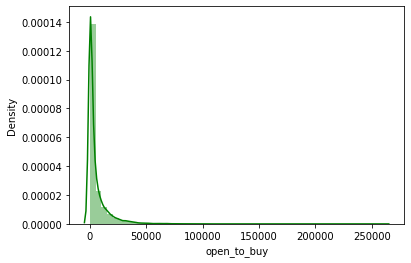

BoxPlot ofopen_to_buy
-----------------------------------------


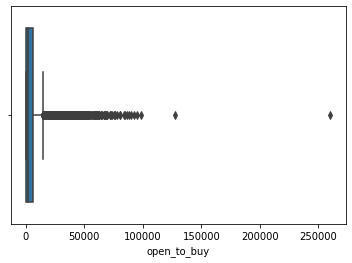

In [232]:
column = 'open_to_buy'

ShowFig(column)

### Dealing with outliers using z-score

Right-skewed distributions 

In [233]:
# Assuming 'feature' is the name of the column containing the data points
feature = df_risk['open_to_buy']
labels = df_risk['label']

# Calculate the mean and standard deviation of the feature
mean = feature.mean()
std = feature.std()

# Calculate the Z-scores for each data point
z_scores = (feature - mean) / std

# Identify data points with Z-scores greater than a threshold 
threshold = 5    # Set your desired threshold here
outliers = feature[z_scores > threshold]

# Remove outliers from the DataFrame
df_risk = df_risk[~df_risk['open_to_buy'].isin(outliers)]

# Print the outliers along with their labels
outliers_with_labels = df_risk.loc[z_scores > threshold, ['open_to_buy', 'label']]
print(outliers_with_labels)


Empty DataFrame
Columns: [open_to_buy, label]
Index: []


Description of months_since_first_loan_issued
---------------------------------------
count    9942.000000
mean       73.960974
std        76.705985
min        -1.000000
25%         9.000000
50%        55.000000
75%       111.000000
max       553.000000
Name: months_since_first_loan_issued, dtype: float64
-------------------------------------
Distribution of months_since_first_loan_issued
---------------------------------------


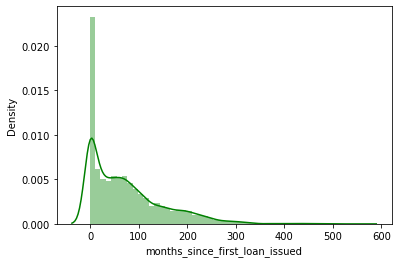

BoxPlot ofmonths_since_first_loan_issued
-----------------------------------------


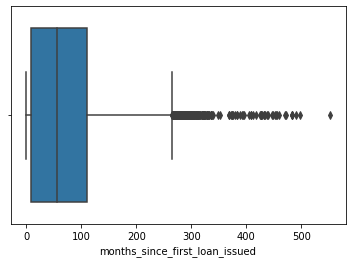

In [234]:
column = 'months_since_first_loan_issued'

ShowFig(column)

### Dealing with outliers using z-score

Right-skewed distributions 

In [235]:
# Assuming 'feature' is the name of the column containing the data points
feature = df_risk['months_since_first_loan_issued']

labels = df_risk['label']

# Calculate the mean and standard deviation of the feature
mean = feature.mean()
std = feature.std()

# Calculate the Z-scores for each data point
z_scores = (feature - mean) / std

# Identify data points with Z-scores greater than a threshold 
threshold = 4    #      75%        112.000000
#outliers = feature[z_scores > threshold]

outliers = feature[z_scores > threshold]

# Remove outliers from the DataFrame (OBS: The model's results are affectly negatively when we remove this outliers )
#df_risk = df_risk[~df_risk['months_since_first_loan_issued'].isin(outliers)]

# Print the outliers along with their labels
outliers_with_labels = df_risk.loc[z_scores > threshold, ['months_since_first_loan_issued', 'label']]
print(outliers_with_labels)

      months_since_first_loan_issued  label
301                            383.0      0
963                            453.0      0
1104                           409.0      0
1157                           384.0      0
1252                           497.0      0
1387                           432.0      0
1641                           553.0      0
2493                           413.0      0
2839                           426.0      0
3348                           394.0      0
3813                           460.0      0
3867                           454.0      0
3895                           426.0      0
3923                           388.0      0
4467                           432.0      0
5652                           429.0      0
5961                           447.0      0
6027                           483.0      0
6610                           405.0      0
6747                           471.0      0
6853                           393.0      0
6919                           4

Description of existing_credit_card_utilization
---------------------------------------
count    9942.000000
mean       31.814122
std        38.065201
min        -1.000000
25%        -1.000000
50%         9.000000
75%        69.000000
max       134.000000
Name: existing_credit_card_utilization, dtype: float64
-------------------------------------
Distribution of existing_credit_card_utilization
---------------------------------------


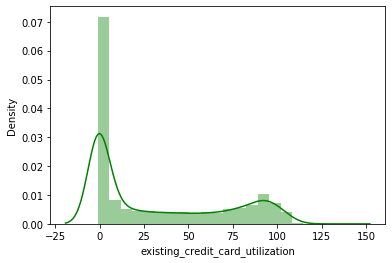

BoxPlot ofexisting_credit_card_utilization
-----------------------------------------


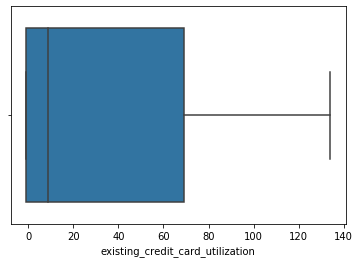

In [236]:
column = 'existing_credit_card_utilization'

ShowFig(column)

Right-skewed distributions 

Description of n_months_mortgage_loan_paid
---------------------------------------
count    9942.000000
mean        8.216355
std         4.734577
min        -1.000000
25%         5.000000
50%        10.000000
75%        12.000000
max        14.000000
Name: n_months_mortgage_loan_paid, dtype: float64
-------------------------------------
Distribution of n_months_mortgage_loan_paid
---------------------------------------


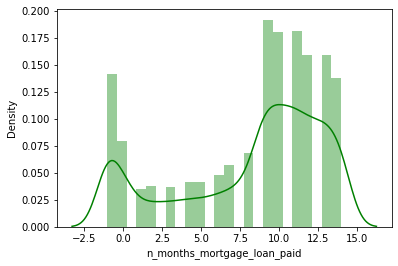

BoxPlot ofn_months_mortgage_loan_paid
-----------------------------------------


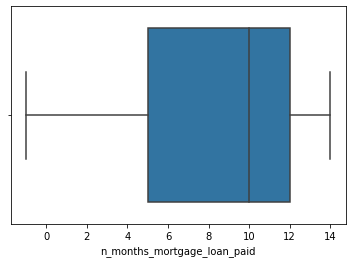

In [237]:
column = 'n_months_mortgage_loan_paid'

ShowFig(column)

Left-skewed distributions 

Description of label
---------------------------------------
count    9942.000000
mean        0.036713
std         0.188066
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64
-------------------------------------
Distribution of label
---------------------------------------


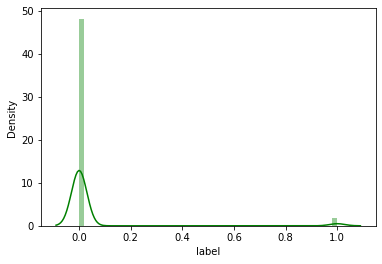

BoxPlot oflabel
-----------------------------------------


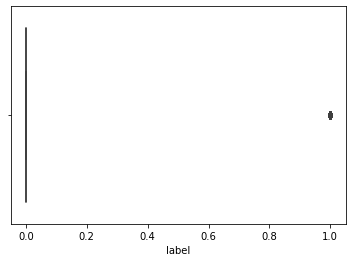

In [238]:
column = 'label'

ShowFig(column)

Imbalaced distibution

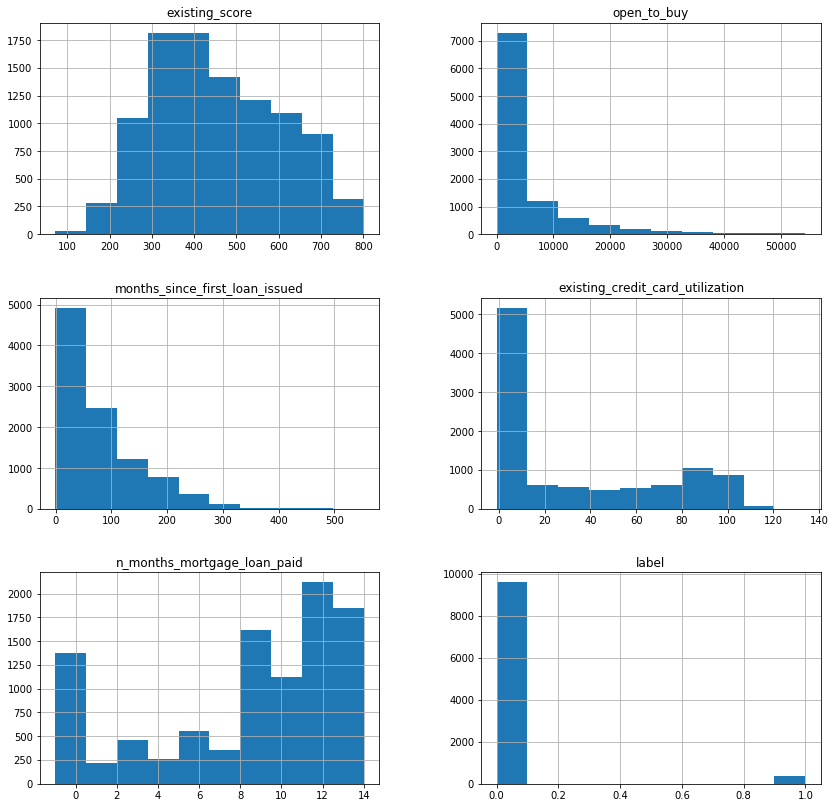

In [239]:
num_cols = ['existing_score','open_to_buy','months_since_first_loan_issued','existing_credit_card_utilization','n_months_mortgage_loan_paid','label']


# Creating histograms
df_risk[num_cols].hist(figsize=(14,14))
plt.show()

### Checking for Correlation

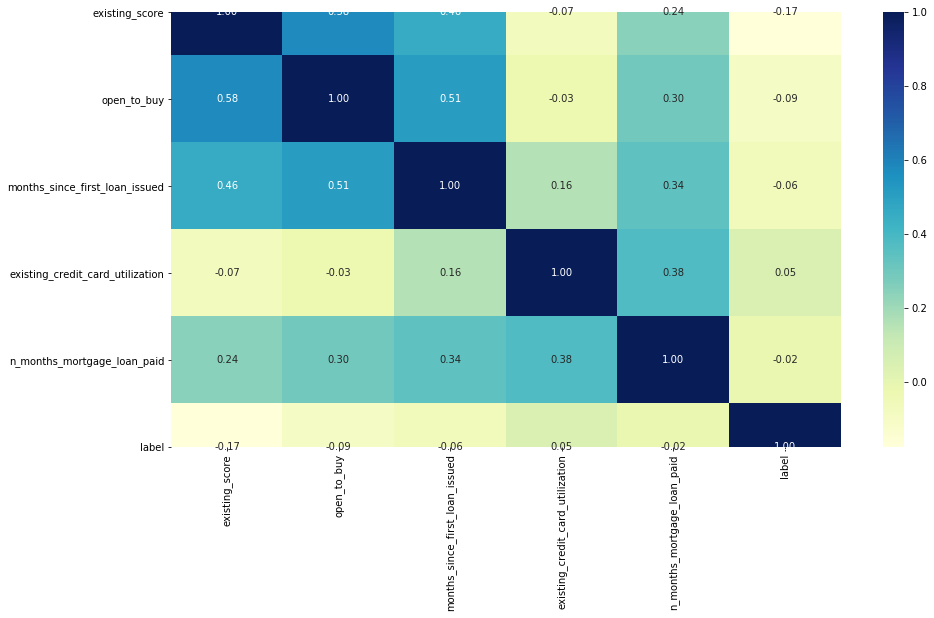

In [240]:
# Plotting the correlation between variables
plt.figure(figsize=(15,8))
sns.heatmap(df_risk[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

There is little correlation between the target variable 'label' and the other variables, it suggests that the predictors may not have a strong linear relationship with the target variable. However, it's important to note that correlation is just one measure of association and may not capture all types of relationships.

In [241]:
# Access the column names of the DataFrame
df_risk.columns

Index(['id', 'existing_score', 'open_to_buy', 'months_since_first_loan_issued',
       'existing_credit_card_utilization', 'n_months_mortgage_loan_paid',
       'label'],
      dtype='object')

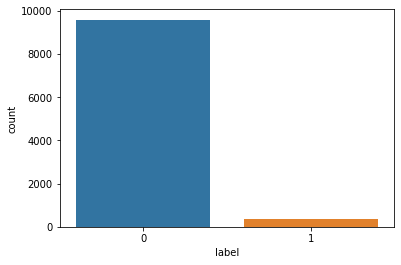

In [243]:
# create a count plot 'target variable' using Seaborn
sns.countplot('label', data = df_risk)

In [244]:
# Calculate the normalized value counts of the 'label' column in the DataFrame
df_risk['label'].value_counts(normalize = True)

0    0.963287
1    0.036713
Name: label, dtype: float64

The distribution of values in the 'label' column

0: This value occurs with a relative frequency of approximately 96.33% or 0.963287. This means that around 96.33% of the entries in the 'label' column have a value of 0.

1: This value occurs with a relative frequency of approximately 3.67% or 0.036713. This indicates that around 3.67% of the entries in the 'label' column have a value of 1.

The output suggests that the 'label' column is imbalanced, with a majority of entries having the value 0 (around 96.33%) and a minority having the value 1 (around 3.67%).

Dealing with imbalanced data is an important consideration in machine learning. Here are several strategies that can be used to address imbalanced data:

1. Collect more data: Increasing the size of the minority class by collecting more data can help to balance the dataset and provide the algorithm with more examples to learn from.

2. Resampling techniques:
    * Undersampling: This involves reducing the number of instances from the majority class to match the minority class. Randomly removing instances from the majority class can help rebalance the data. However, undersampling may result in the loss of useful information.
    * Oversampling: This involves increasing the number of instances in the minority class by replicating or generating synthetic examples. Techniques like Synthetic Minority Oversampling Technique (SMOTE) can be used to create synthetic examples based on the characteristics of existing minority class samples.
    * Combination: Combining undersampling and oversampling techniques can be effective. For example, undersampling the majority class and then applying oversampling techniques to the minority class.

3. Class weighting: Many machine learning algorithms allow assigning different weights to different classes. By assigning higher weights to the minority class, the algorithm can pay more attention to correctly predicting instances of the minority class.

4. Algorithmic techniques:
    * Ensemble methods: Using ensemble methods like Random Forests or boosting algorithms such as AdaBoost or XGBoost can help improve the performance on imbalanced datasets by combining multiple models.
    * Anomaly detection: If the minority class represents anomalies or rare events, using anomaly detection algorithms instead of traditional classification algorithms may be more effective.

5. Evaluation metrics: Instead of relying solely on accuracy, consider using evaluation metrics that are more appropriate for imbalanced datasets, such as precision, recall, F1 score, or area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC).

6. Data augmentation: Generating additional samples for the minority class using techniques like data augmentation can help increase the representation of the minority class in the dataset.

The choice of the appropriate strategy depends on the specific dataset and the problem at hand. It's recommended to experiment with different approaches and evaluate their impact on the model's performance using appropriate evaluation metrics.

In [245]:
# making copies of dataset
df_risk_1 = df_risk.copy()

### Extracting the target column into separate vectors for training set and test set

In [246]:
X = df_risk_1.drop('label', axis = 1)

y = df_risk_1.pop('label')

### Splitting data into training and test set

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [248]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (6959, 6)
X_test (2983, 6)
y_train (6959,)
y_test (2983,)


By applying SMOTE, we balance the class distribution by oversampling the minority class to match the majority class. This helps to mitigate the issue of imbalanced data and can improve the performance of the model on the minority class.

In [165]:
# Instantiate the SMOTE object
#smote = SMOTE(random_state = 42)

In [166]:
# Apply SMOTE to the training data
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Some commonly used and effective classification models that you can consider

Logistic Regression: A linear model that is widely used for binary classification. It is interpretable and works well when the classes are linearly separable.

Random Forest: An ensemble model that combines multiple decision trees. It is robust, handles a mixture of feature types, and is effective for both binary and multi-class classification problems.

Gradient Boosting Methods (e.g., XGBoost, LightGBM, CatBoost): These models build an ensemble of weak learners in a sequential manner. They often provide excellent predictive performance and handle complex relationships in the data.

Support Vector Machines (SVM): A powerful model that finds a hyperplane that separates the classes with a maximum margin. It can handle complex decision boundaries and is effective in high-dimensional spaces.

Naive Bayes: A probabilistic model based on Bayes' theorem. It assumes independence between features and works well with high-dimensional data. It is particularly useful for text classification tasks.

Neural Networks: Deep learning models that can learn complex patterns and relationships in the data. They are especially effective when dealing with large-scale and high-dimensional datasets.

K-Nearest Neighbors (KNN): A non-parametric model that classifies instances based on the classes of their k nearest neighbors. It is simple and works well for both binary and multi-class classification problems.

### XGBoost

In [249]:
# Define the XGBoost classifier model and set the desired hyperparameters
xg_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [250]:
# Fit the XGBoost model on the training data
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [251]:
# Predict on the test set using the trained model
y_pred = xg_model.predict(X_test)

In [252]:
# Evaluate the performance of the model using appropriate evaluation metrics

accuracy_xg = accuracy_score(y_test, y_pred)
precision_xg = precision_score(y_test, y_pred)
recall_xg = recall_score(y_test, y_pred)
f1_xg = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_xg)
print("Precision:", precision_xg)
print("Recall:", recall_xg)
print("F1 score:", f1_xg)

Accuracy: 0.9634596044250754
Precision: 0.0
Recall: 0.0
F1 score: 0.0


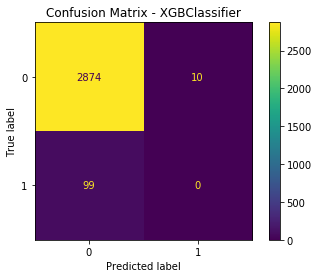

In [253]:
# Plot the confusion matrix For XGBClassifier
plot_confusion_matrix(xg_model, X_test, y_test)
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

* True Positive (TP): The model correctly predicted instances of class 1 as class 1. In this case, there are 0 true positives, as the model did not predict any instances as class 1.


* True Negative (TN): The model correctly predicted instances of class 0 as class 0. In this case, there are 2874 true negatives, as the model predicted class 0 for all instances of class 0.


* False Positive (FP): The model incorrectly predicted instances of class 0 as class 1. In this case, there are 10 false positives, as the model predicted class 1 for 10 instances of class 0.


* False Negative (FN): The model incorrectly predicted instances of class 1 as class 0. In this case, there are 99 false negatives, as the model predicted class 0 for 99 instances of class 1.


In this case, the model did not correctly predict any instances as class 1, resulting in 0 true positives and 99 false negatives. The true negatives and false positives are the same as in the previous confusion matrix example. 

### RandomForestClassifier

In [254]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=220, max_depth= 20, random_state = 1)

In [255]:
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=220, random_state=1)

In [256]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [257]:
# Evaluate the model's performance using appropriate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

print("Accuracy RF:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 score:", f1_rf)

Accuracy RF: 0.9668119342943345
Precision: 0.0
Recall: 0.0
F1 score: 0.0


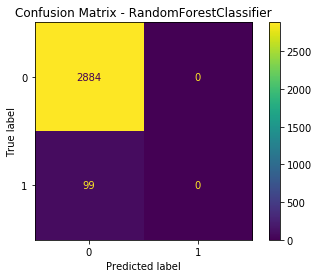

In [258]:
# Plot the confusion matrix For RandomForestClassifier
plot_confusion_matrix(rf_classifier, X_test, y_test)
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

* True Positive (TP): The model correctly predicted instances of class 1 as class 1. In this case, there are 0 true positives, as the model did not predict any instances as class 1.


* True Negative (TN): The model correctly predicted instances of class 0 as class 0. In this case, there are 2884 true negatives, as the model predicted class 0 for all instances of class 0.


* False Positive (FP): The model incorrectly predicted instances of class 0 as class 1. In this case, there are 0 false positives, as the model did not make any false positive predictions.


* False Negative (FN): The model incorrectly predicted instances of class 1 as class 0. In this case, there are 99 false negatives, as the model predicted class 0 for all instances of class 1.


In this case, the model correctly predicted all instances of class 0 but failed to predict any instances of class 1, resulting in 0 true positives and 99 false negatives.

### Evaluate the performance of the RandomForestClassifier and XGBClassifier models using a diagram and AUC-ROC

In [259]:
# Calculate the predicted probabilities for the positive class
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_prob_xg = xg_model.predict_proba(X_test)[:, 1]

In [260]:
# Calculate the AUC-ROC scores for both models
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_roc_xg = roc_auc_score(y_test, y_pred_prob_xg)

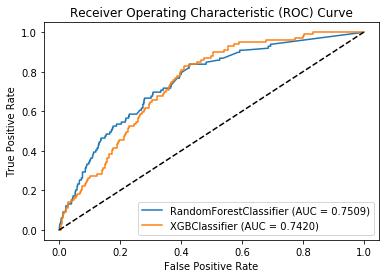

In [261]:
# Plot the ROC curves for both models

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_prob_xg)

plt.plot(fpr_rf, tpr_rf, label='RandomForestClassifier (AUC = {:.4f})'.format(auc_roc_rf))
plt.plot(fpr_xg, tpr_xg, label='XGBClassifier (AUC = {:.4f})'.format(auc_roc_xg))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [262]:
# Print the evaluation metrics for both models
print("RandomForestClassifier:")
print("  Accuracy_rf:", accuracy_rf)
print("  Precision_rf:", precision_rf)
print("  Recall_rf:", recall_rf)
print("  F1 score_rf:", f1_rf)

print("XGBClassifier:")
print("  Accuracy_xg:", accuracy_xg)
print("  Precision_xg:", precision_xg)
print("  Recall_xg:", recall_xg)
print("  F1 score_xg:", f1_xg)


RandomForestClassifier:
  Accuracy_rf: 0.9668119342943345
  Precision_rf: 0.0
  Recall_rf: 0.0
  F1 score_rf: 0.0
XGBClassifier:
  Accuracy_xg: 0.9634596044250754
  Precision_xg: 0.0
  Recall_xg: 0.0
  F1 score_xg: 0.0


Accuracy: Accuracy measures the overall correctness of the model's predictions. It is calculated as the ratio of the number of correct predictions (both true positives and true negatives) to the total number of predictions. In the case of RandomForestClassifier and XGBClassifier, the accuracy scores are approximately 0.967 and 0.963, respectively. These scores indicate that the models correctly predicted the class labels for around 96.7% and 96.3% of the instances in the test set, respectively.

Precision: Precision is the proportion of true positive predictions out of the total predicted positives. It indicates how well the model performs in terms of correctly identifying positive instances. In this case, the precision scores for both RandomForestClassifier and XGBClassifier are 0.0. A precision score of 0 indicates that the models did not make any true positive predictions, resulting in no correct positive predictions.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly identified by the model. It calculates the ratio of true positives to the sum of true positives and false negatives. Similar to precision, the recall scores for both models are 0.0, indicating that no positive instances were correctly identified by the models.

F1 score: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score is useful when there is an imbalance between the positive and negative classes. In this case, the F1 scores for both models are 0.0 due to zero precision and recall.

AUC-ROC: The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a popular evaluation metric for binary classification problems. It measures the performance of the model in terms of its ability to discriminate between positive and negative instances at various classification thresholds. The AUC-ROC scores for RandomForestClassifier and XGBClassifier are 0.7509 and 0.7420, respectively. These scores indicate that both models have some discriminatory power in distinguishing between the positive and negative classes, although the scores are relatively moderate.

It's important to note that the precision, recall, F1 score, and AUC-ROC metrics are only meaningful when there are positive predictions made by the models. In this case, since both models have zero positive predictions, these metrics are not informative. It suggests that there might be an issue with the model's performance or the data itself. It's recommended to review the data, model training process, and evaluation metrics to address any potential issues and improve the model's performance.